1) Delivery_time -> Predict delivery time using sorting time


# **Import Libraries**

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [180]:
# import dataset
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# **EDA and Data Visualization**

In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


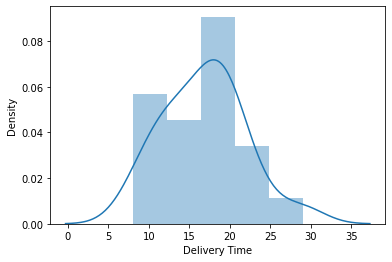

In [182]:
sns.distplot(dataset['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


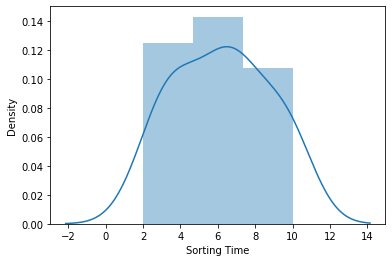

In [183]:
sns.distplot(dataset['Sorting Time'])

# **Feature Engineering**

In [184]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# **Correlation Analysis**

In [185]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


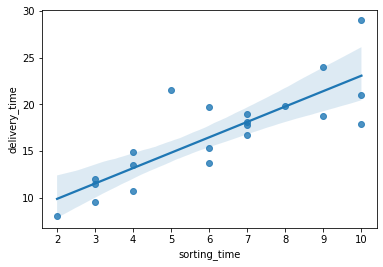

In [186]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

# **Model Building (Simple linear Regression Model)**

In [187]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

**Model Testing**

In [188]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [189]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [190]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# **Model Building (Logrithm Transformation Model)**

In [191]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [192]:
modellog=smf.ols("delivery_time~np.log(sorting_time)",data=dataset).fit()

**Model Testing**

In [193]:
# Finding Coefficient parameters
modellog.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [194]:
# Finding tvalues and pvalues
modellog.tvalues , modellog.pvalues

(Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64, Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64)

In [195]:
# Finding Rsquared Values
modellog.rsquared , modellog.rsquared_adj

(0.6954434611324224, 0.6794141696130762)

# **Model Building (Square root Transformation Model)**

In [196]:
modelsqrt=smf.ols("delivery_time~np.sqrt(sorting_time)",data=dataset).fit()

**Model Testing**

In [197]:
# Finding Coefficient parameters
modelsqrt.params

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64

In [198]:
# Finding tvalues and pvalues
modelsqrt.tvalues , modelsqrt.pvalues

(Intercept               -0.840911
 np.sqrt(sorting_time)    6.592434
 dtype: float64, Intercept                0.410857
 np.sqrt(sorting_time)    0.000003
 dtype: float64)

In [199]:
# Finding Rsquared Values
modelsqrt.rsquared , modelsqrt.rsquared_adj

(0.695806227630867, 0.6797960290851232)

# **Model Building (Exponential Transformation Model)**

In [200]:
modelexpo=smf.ols("delivery_time~np.exp(sorting_time)",data=dataset).fit()

**Model Testing**

In [201]:
# Finding Coefficient parameters
modelexpo.params

Intercept               15.083578
np.exp(sorting_time)     0.000393
dtype: float64

In [202]:
# Finding tvalues and pvalues
modelexpo.tvalues , modelexpo.pvalues

(Intercept               14.406456
 np.exp(sorting_time)     3.277108
 dtype: float64, Intercept               1.117304e-11
 np.exp(sorting_time)    3.964511e-03
 dtype: float64)

In [203]:
# Finding Rsquared Values
modelexpo.rsquared , modelexpo.rsquared_adj

(0.3611177022709089, 0.3274923181799041)

# **Model Building (Sin Transformation Model)**

In [204]:
modelsin=smf.ols("delivery_time~np.sin(sorting_time)",data=dataset).fit()

**Model Testing**

In [205]:
# Finding Coefficient parameters
modelsin.params

Intercept               16.793650
np.sin(sorting_time)    -0.759948
dtype: float64

In [206]:
# Finding tvalues and pvalues
modelsin.tvalues , modelsin.pvalues

(Intercept               14.844384
 np.sin(sorting_time)    -0.406534
 dtype: float64, Intercept               6.611298e-12
 np.sin(sorting_time)    6.888931e-01
 dtype: float64)

In [207]:
# Finding Rsquared Values
modelsin.rsquared , modelsin.rsquared_adj

(0.008623399326598058, -0.04355431649831787)

# **Model Building (cos Transformation Model)**

In [208]:
modelcos=smf.ols("delivery_time~np.cos(sorting_time)",data=dataset).fit()

**Model Testing**

In [209]:
# Finding Coefficient parameters
modelcos.params

Intercept               16.899468
np.cos(sorting_time)     0.623950
dtype: float64

In [210]:
# Finding tvalues and pvalues
modelcos.tvalues , modelcos.pvalues

(Intercept               14.584363
 np.cos(sorting_time)     0.428666
 dtype: float64, Intercept               9.013585e-12
 np.cos(sorting_time)    6.729869e-01
 dtype: float64)

In [211]:
# Finding Rsquared Values
modelcos.rsquared , modelcos.rsquared_adj

(0.009578658981799548, -0.042548780019158405)

# **Model Building (tan Transformation Model)**

In [212]:
modeltan=smf.ols("delivery_time~np.tan(sorting_time)",data=dataset).fit()

**Model Testing**

In [213]:
# Finding Coefficient parameters
modeltan.params

Intercept               16.727786
np.tan(sorting_time)    -0.234105
dtype: float64

In [214]:
# Finding tvalues and pvalues
modeltan.tvalues , modeltan.pvalues

(Intercept               14.618741
 np.tan(sorting_time)    -0.377462
 dtype: float64, Intercept               8.649371e-12
 np.tan(sorting_time)    7.100137e-01
 dtype: float64)

In [215]:
# Finding Rsquared Values
modeltan.rsquared , modeltan.rsquared_adj

(0.007443004357947092, -0.04479683751795038)

# **Model Building (log1p Transformation Model)**

In [216]:
modellog1p=smf.ols("delivery_time~np.log1p(sorting_time)",data=dataset).fit()

**Model Testing**

In [217]:
# Finding Coefficient parameters
modellog1p.params

Intercept                 -4.099013
np.log1p(sorting_time)    10.959246
dtype: float64

In [218]:
# Finding tvalues and pvalues
modellog1p.tvalues , modellog1p.pvalues

(Intercept                -1.272674
 np.log1p(sorting_time)    6.611817
 dtype: float64, Intercept                 0.218488
 np.log1p(sorting_time)    0.000003
 dtype: float64)

In [219]:
# Finding Rsquared Values
modellog1p.rsquared , modellog1p.rsquared_adj

(0.6970476042045002, 0.6811027412678949)

# **Model Building (Quadratic Transformation Model)**

In [220]:
dataset['sq_sort_time']=dataset.sorting_time*dataset.sorting_time

In [221]:
modelquad=smf.ols("dataset.delivery_time~dataset.sq_sort_time+dataset.sorting_time",data=dataset).fit()

**Model Testing**

In [222]:
# Finding Coefficient parameters
modelquad.params

Intercept               3.522234
dataset.sq_sort_time   -0.093198
dataset.sorting_time    2.813002
dtype: float64

In [223]:
# Finding tvalues and pvalues
modelquad.tvalues , modelquad.pvalues

(Intercept               0.846756
 dataset.sq_sort_time   -0.809783
 dataset.sorting_time    1.925632
 dtype: float64, Intercept               0.408248
 dataset.sq_sort_time    0.428641
 dataset.sorting_time    0.070097
 dtype: float64)

In [224]:
# Finding Rsquared Values
modelquad.rsquared , modelquad.rsquared_adj

(0.6934396274520247, 0.659377363835583)

# **Model Building (Polynomial Transformation Model)**

In [225]:
modelpoly=smf.ols("delivery_time~sorting_time+I(sorting_time^2)",data=dataset).fit()

**Model Testing**

In [226]:
# Finding Coefficient parameters
modelpoly.params

Intercept              6.783730
sorting_time           1.319023
I(sorting_time ^ 2)    0.333437
dtype: float64

In [227]:
# Finding tvalues and pvalues
modelpoly.tvalues , modelpoly.pvalues

(Intercept              3.908566
 sorting_time           3.108731
 I(sorting_time ^ 2)    0.980627
 dtype: float64, Intercept              0.001030
 sorting_time           0.006062
 I(sorting_time ^ 2)    0.339774
 dtype: float64)

In [228]:
# Finding Rsquared Values
modelpoly.rsquared , modelpoly.rsquared_adj

(0.6983849286381746, 0.6648721429313051)

# **Model Building (Cubic Transformation Model)**

In [229]:
modelcubic=smf.ols("delivery_time~sorting_time+I(sorting_time^2)+I(sorting_time^3)",data=dataset).fit()

**Model Testing**

In [230]:
# Finding Coefficient parameters
modelcubic.params

Intercept              6.733796
sorting_time           1.316197
I(sorting_time ^ 2)    0.791320
I(sorting_time ^ 3)   -0.441867
dtype: float64

In [231]:
# Finding tvalues and pvalues
modelcubic.tvalues , modelcubic.pvalues

(Intercept              3.817243
 sorting_time           3.054603
 I(sorting_time ^ 2)    1.039048
 I(sorting_time ^ 3)   -0.674540
 dtype: float64, Intercept              0.001378
 sorting_time           0.007168
 I(sorting_time ^ 2)    0.313336
 I(sorting_time ^ 3)    0.509038
 dtype: float64)

In [232]:
# Finding Rsquared Values
modelcubic.rsquared , modelcubic.rsquared_adj

(0.7062472047242188, 0.6544084761461397)

# **Model Building (Square root+Cubic Transformation Model)**

In [233]:
modelsqrtcubic=smf.ols("delivery_time~np.sqrt(sorting_time)+sorting_time+I(sorting_time^2)+I(sorting_time^3)",data=dataset).fit()

**Model Testing**

In [234]:
# Finding Coefficient parameters
modelsqrtcubic.params

Intercept               -2.635899
np.sqrt(sorting_time)    8.195203
sorting_time            -0.349034
I(sorting_time ^ 2)      0.672257
I(sorting_time ^ 3)     -0.370619
dtype: float64

In [235]:
# Finding tvalues and pvalues
modelsqrtcubic.tvalues , modelcubic.pvalues

(Intercept               -0.178759
 np.sqrt(sorting_time)    0.640188
 sorting_time            -0.132316
 I(sorting_time ^ 2)      0.843322
 I(sorting_time ^ 3)     -0.548283
 dtype: float64, Intercept              0.001378
 sorting_time           0.007168
 I(sorting_time ^ 2)    0.313336
 I(sorting_time ^ 3)    0.509038
 dtype: float64)

In [236]:
# Finding Rsquared Values
modelsqrtcubic.rsquared , modelcubic.rsquared_adj

(0.7135837714239137, 0.6544084761461397)

All models results

In [237]:
#Simple linear Regression Model 
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [238]:
#Logrithm Transformation Model  
modellog.rsquared , modellog.rsquared_adj

(0.6954434611324224, 0.6794141696130762)

In [239]:
#Square root Transformation Model 
modelsqrt.rsquared , modelsqrt.rsquared_adj

(0.695806227630867, 0.6797960290851232)

In [240]:
#Exponential Transformation Model 
modelexpo.rsquared , modelexpo.rsquared_adj

(0.3611177022709089, 0.3274923181799041)

In [241]:
#Sin Transformation Model 
modelsin.rsquared , modelsin.rsquared_adj

(0.008623399326598058, -0.04355431649831787)

In [242]:
#cos Transformation Model  
modelcos.rsquared , modelcos.rsquared_adj

(0.009578658981799548, -0.042548780019158405)

In [243]:
#tan Transformation Model 
modeltan.rsquared , modeltan.rsquared_adj

(0.007443004357947092, -0.04479683751795038)

In [244]:
#log1p Transformation Model 
modellog1p.rsquared , modellog1p.rsquared_adj

(0.6970476042045002, 0.6811027412678949)

In [245]:
#Quadratic Transformation Model  
modelquad.rsquared , modelquad.rsquared_adj

(0.6934396274520247, 0.659377363835583)

In [246]:
#Polynomial Transformation Model 
modelpoly.rsquared , modelpoly.rsquared_adj

(0.6983849286381746, 0.6648721429313051)

In [247]:
#Cubic Transformation Model 
modelcubic.rsquared , modelcubic.rsquared_adj 

(0.7062472047242188, 0.6544084761461397)

In [248]:
#Square root+Cubic Transformation Model 
modelsqrtcubic.rsquared , modelcubic.rsquared_adj

(0.7135837714239137, 0.6544084761461397)

Hence, best model is quare root+Cubic Transformation Model

# **Model Predictions**

In [249]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [250]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [251]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [252]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64